In [1]:
import numpy as np
from scipy import stats
import pickle as pk
import matplotlib.pyplot as plt
import math

In [2]:
def itt_nu(vlass_flux, nvss_flux):
    freq_nvss = 1.4
    freq_vlass = [0, 2.4]
    nu = [-0.7]
    i = 1
    #while (freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i] > 0.05:
    while i < 100:
        #print((freq_vlass[i]-freq_vlass[i-1])/freq_vlass[i])
        const_v = np.log(freq_vlass[i]/freq_nvss)

        spectral_index = (np.log(vlass_flux/nvss_flux)/(const_v)) 
        freq_vlass_guess = 2 + 2*(spectral_index+1)/(spectral_index+2)
        
        freq_vlass.append(freq_vlass_guess)
        nu.append(spectral_index)
        i+=1
        if i > 100:
            print('Error, did not converge')
            return(freq_vlass, nu)
    return(freq_vlass, nu)
        

In [25]:
itt_nu(0.001, 0.00165)

([0,
  2.4,
  2.1324325706671026,
  1.5306191201646353,
  4.553392974392988,
  2.730479872290049,
  2.4004378417779026,
  2.1329805769239654,
  1.5328314806979144,
  4.567438371064185,
  2.7313704299631567,
  2.4009056510228954,
  2.1335652159909535,
  1.535183775059945,
  4.582630595631807,
  2.7323240550478545,
  2.4014056121402403,
  2.1341890398577923,
  1.5376847183709605,
  4.5990829333794725,
  2.73334565169592,
  2.4019400909776585,
  2.134854797034307,
  1.5403435694364418,
  4.616923102574601,
  2.734440576389124,
  2.402511653785006,
  2.1355654512701814,
  1.5431701691460673,
  4.636295652494855,
  2.735614691645512,
  2.4031230888538686,
  2.136324202757165,
  1.5461749831819178,
  4.657364865353344,
  2.7368744281879023,
  2.4037774313421605,
  2.1371345122742884,
  1.5493691499076783,
  4.680318291527284,
  2.738226857289694,
  2.4044779919083044,
  2.1380001288462585,
  1.5527645345436387,
  4.705371087166737,
  2.739679775440743,
  2.405228389932917,
  2.13892512162596

In [53]:
act_fluxes_dict = pk.load(open('ACT_central_flux_Dec03.pickle', 'rb'))
mdcw_fluxes_dict = pk.load(open('Madcows_central_flux_Dec03.pickle', 'rb'))



In [21]:
print(act_fluxes_dict)

{'Name': ['Central Flux', 'Median Background'], 'ACT-CL J1241.8+1948': [0.00019657496342430873, -3.355549253169917e-05], 'ACT-CL J0130.0-0305': [0.000775181047888298, 3.495269379255552e-05], 'ACT-CL J1027.1+0439': [-0.00013566771177058197, 2.2114181305798664e-05], 'ACT-CL J1558.8+1534': [0.00013726979715931304, 9.629237375178223e-07], 'ACT-CL J0921.0-0148': [-0.00010877525043144624, 1.8434434053261995e-05], 'ACT-CL J2303.3+0756': [0.0022464287625879858, -5.324803822985703e-05], 'ACT-CL J0036.7-2105': [9.48844882723406e-05, -1.650950395662277e-05], 'ACT-CL J1547.3+1717': [0.00023676567640252893, 4.696637997022466e-05], 'ACT-CL J0125.7-0633': [0.0008992245828797376, -1.9107630614913663e-05], 'ACT-CL J1254.3+1228': [1.1829613474960012e-05, 4.923990601366599e-06], 'ACT-CL J2318.7+1305': [0.0005013679745898872, 2.106776036847435e-05], 'ACT-CL J0322.6-0257': [7.190530972801476e-05, 5.374606874637442e-05], 'ACT-CL J0527.1-3203': [0.00024368466741641164, 5.047533031410383e-05], 'ACT-CL J1258.7

In [88]:
nvss_act_fluxes = np.zeros(len(act_fluxes_dict.keys())-1)
back_sub_nvss_act_fluxes =np.zeros(len(act_fluxes_dict.keys())-1)
for i, key in enumerate(act_fluxes_dict.keys()):
    if i == 0: continue
    nvss_act_fluxes[i-1] = act_fluxes_dict[key][0]
    back_sub_nvss_act_fluxes[i-1] = (act_fluxes_dict[key][0] - act_fluxes_dict[key][1])
    
nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
back_sub_nvss_mdcw_fluxes = np.zeros(len(mdcw_fluxes_dict.keys())-1)
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i == 0: continue
    nvss_mdcw_fluxes[i-1] = mdcw_fluxes_dict[key][0]
    back_sub_nvss_mdcw_fluxes[i-1] = (mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1])
    


#print(len(back_sub_nvss_act_fluxes))
cut = -99
nvss_act_fluxes = nvss_act_fluxes[nvss_act_fluxes > cut]
nvss_mdcw_fluxes = nvss_mdcw_fluxes[nvss_mdcw_fluxes > cut]
nvss_act_fluxes.sort()
nvss_mdcw_fluxes.sort()

back_sub_nvss_act_fluxes = back_sub_nvss_act_fluxes[back_sub_nvss_act_fluxes > cut]
back_sub_nvss_mdcw_fluxes = back_sub_nvss_mdcw_fluxes[back_sub_nvss_mdcw_fluxes > cut]
back_sub_nvss_act_fluxes.sort()
#back_sub_nvss_mdcw_fluxes.sort()

min_act = min(back_sub_nvss_act_fluxes)
min_mdcw = min(back_sub_nvss_mdcw_fluxes)

#back_sub_nvss_act_fluxes = [1e3*value for value in back_sub_nvss_act_fluxes]
#back_sub_nvss_mdcw_fluxes = [1e3*value for value in back_sub_nvss_mdcw_fluxes]

#back_sub_nvss_act_fluxes = [value+min_act for value in back_sub_nvss_act_fluxes]
#back_sub_nvss_mdcw_fluxes = [value+min_mdcw for value in back_sub_nvss_mdcw_fluxes]
print(np.where((back_sub_nvss_mdcw_fluxes == max(back_sub_nvss_mdcw_fluxes))))



(array([2573]),)


0.0009387015319125146


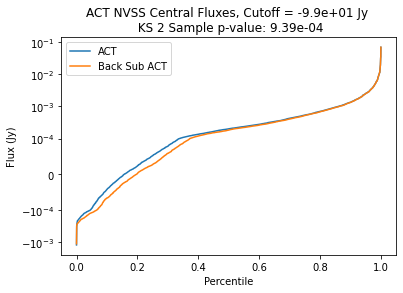

0.0006333574277120721 0.0006134887337356739
0.000505258808598859
0.00040466058754151527 0.00038519370716063917


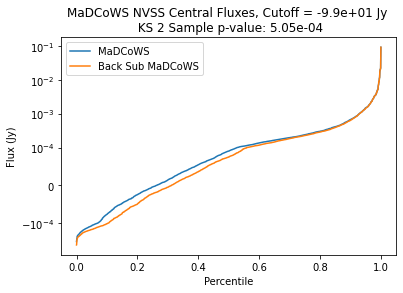

0.9999999999999979


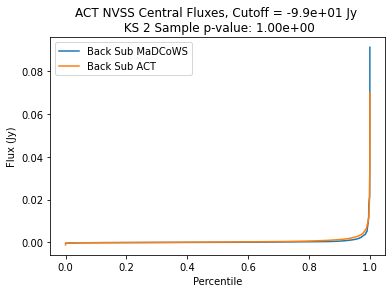

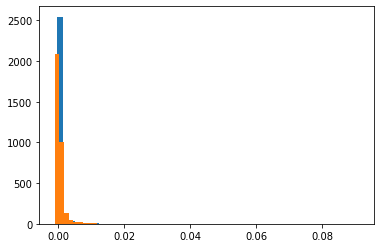

In [26]:
x0 = np.arange(len(nvss_act_fluxes))
x1 = np.arange(len(nvss_mdcw_fluxes))
x2 =  np.arange(len(back_sub_nvss_act_fluxes))
x3 =  np.arange(len(back_sub_nvss_mdcw_fluxes))



plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(nvss_act_fluxes, back_sub_nvss_act_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_back_sub.pdf')
plt.show()
print(np.mean(nvss_act_fluxes),np.mean(back_sub_nvss_act_fluxes))


plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(nvss_mdcw_fluxes, back_sub_nvss_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_mdcw_back_sub.pdf')
print(np.mean(nvss_mdcw_fluxes),np.mean(back_sub_nvss_mdcw_fluxes))
plt.show()
plt.close()

plt.plot(x3/len(x3), back_sub_nvss_mdcw_fluxes, label = 'Back Sub MaDCoWS')
#plt.plot(x1/len(x1), nvss_mdcw_fluxes, label = 'MaDCoWS')
#plt.plot(x0/len(x0), nvss_act_fluxes, label = 'ACT')
plt.plot(x2/len(x2), back_sub_nvss_act_fluxes, label = 'Back Sub ACT')
p_value = stats.ks_2samp(back_sub_nvss_mdcw_fluxes, back_sub_nvss_act_fluxes)[1]

plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('ACT NVSS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
#plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/NVSS_act_mdcw_comp_back_sub.pdf')
plt.show()

plt.hist(back_sub_nvss_mdcw_fluxes, bins = 50)
plt.hist(back_sub_nvss_act_fluxes, bins = 50)
plt.show()

# VLASS KS Test

In [48]:
vlass_mdcw_fluxes_dict = pk.load(open('./pks/smooth_vlass.p', 'rb'))


In [49]:
vlass_dict_mdcw = {}

vlass_mdcw_fluxes = []
back_sub_vlass_mdcw_fluxes = []
for i, key in enumerate(vlass_mdcw_fluxes_dict.keys()):
    if i == 0: continue
    if np.isnan(vlass_mdcw_fluxes_dict[key][0]) or np.isnan(vlass_mdcw_fluxes_dict[key][1]):continue
    flux = vlass_mdcw_fluxes_dict[key][0]
    backsub_flux = vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1]
    vlass_dict_mdcw[key] = [flux, backsub_flux]
    vlass_mdcw_fluxes.append(flux)
    back_sub_vlass_mdcw_fluxes.append(backsub_flux)

vlass_mdcw_fluxes = np.array(vlass_mdcw_fluxes)    
back_sub_vlass_mdcw_fluxes= np.array(back_sub_vlass_mdcw_fluxes)

cut = -99
vlass_mdcw_fluxes = vlass_mdcw_fluxes[vlass_mdcw_fluxes > cut]
vlass_mdcw_fluxes.sort()

back_sub_vlass_mdcw_fluxes = back_sub_vlass_mdcw_fluxes[back_sub_vlass_mdcw_fluxes > cut]
back_sub_vlass_mdcw_fluxes.sort()

In [50]:
print(np.mean(back_sub_vlass_mdcw_fluxes))
print(np.mean(vlass_mdcw_fluxes))


0.0006376277880704783
0.0013041119


8.022431620468353e-49
0.0013041119 0.0006376277880704783


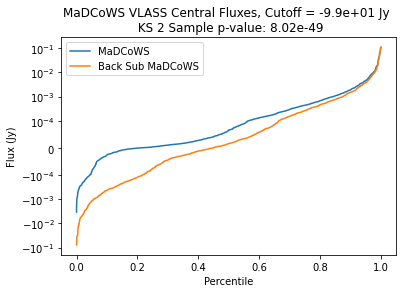

In [39]:
x1 = np.arange(len(vlass_mdcw_fluxes))
x3 =  np.arange(len(back_sub_vlass_mdcw_fluxes))

plt.plot(x1/len(x1), vlass_mdcw_fluxes, label = 'MaDCoWS')
plt.plot(x3/len(x3), back_sub_vlass_mdcw_fluxes, label = 'Back Sub MaDCoWS')
p_value = stats.ks_2samp(vlass_mdcw_fluxes, back_sub_vlass_mdcw_fluxes)[1]

#p_value = stats.ks_2samp(nvss_act_fluxes, nvss_mdcw_fluxes)[1]
plt.legend()

plt.xlabel('Percentile')
plt.ylabel('Flux (Jy)')
plt.title('MaDCoWS VLASS Central Fluxes, Cutoff = {:.1e} Jy \n KS 2 Sample p-value: {:.2e}'.format(cut, p_value))
plt.yscale('symlog', linthreshy=1e-4)

print(p_value)
plt.savefig('./plots/KStests/VLASS_mdcw_back_sub.pdf')
print(np.mean(vlass_mdcw_fluxes),np.mean(back_sub_vlass_mdcw_fluxes))
plt.show()
plt.close()


# Compute spectral indecies

In [3]:
mooFile = open("madcowsCentralFlux.txt",'r')
mooLines = mooFile.readlines()
actFile = open("actCentralFlux.txt",'r')
actLines = actFile.readlines()
vlassmooNameArr = [] # moo names stored here
vlassmooFluxArr = [] # moo fluxes stored here
for line in mooLines:
    vlassmooNameArr.append(line.strip()[2:15])
    vlassmooFluxArr.append(float(line.strip()[18:len(line.strip())-2]))
vlassactNameArr = [] # act names stored here
vlassactFluxArr = [] # act fluxes stored here
for line in actLines:
    
    temp = float(line.strip()[23:len(line.strip())-2])
    if np.isnan(temp):continue
    vlassactFluxArr.append(temp)
    vlassactNameArr.append(line.strip()[2:21])

vlass_act_fluxes_dict = {}
#print(mooLines)
for i, key in enumerate(vlassactNameArr):
    vlass_act_fluxes_dict[key] = vlassactFluxArr[i]
vlass_mdcw_fluxes_dict = {}
for i, key in enumerate(vlassmooNameArr):
    vlass_mdcw_fluxes_dict[key] = vlassmooFluxArr[i]

In [4]:
nvss_act_fluxes_dict = pk.load(open('ACT_central_flux.pickle', 'rb'))
nvss_mdcw_fluxes_dict = pk.load(open('Madcows_central_flux.pickle', 'rb'))
#nvss_act_fluxes_dict.pop('Name')
#nvss_mdcw_fluxes_dict.pop('Name')

In [5]:

print(len(vlass_mdcw_fluxes_dict))

2199


In [70]:
radio_dict = {}

for key in vlass_dict_mdcw.keys():
    const_v = np.log(2.4/1.4)
    #print(key)
    temp_key = key[:-5]
    
    if temp_key in mdcw_fluxes_dict.keys():
        nvss_backsub_flux = mdcw_fluxes_dict[temp_key][0] - mdcw_fluxes_dict[temp_key][1]
        vlass_backsub_flux = vlass_dict_mdcw[key][0] - vlass_mdcw_fluxes_dict[key][1]
        if nvss_backsub_flux < 5e-3 or vlass_backsub_flux < 5e-3: continue
        
        spectral_index = (np.log(vlass_backsub_flux/nvss_backsub_flux)/(const_v))
        
        if np.isnan(spectral_index): continue
        #print(np.abs(vlass_mdcw_fluxes_dict[vlasskey]/float(nvss_mdcw_fluxes_dict[key])))
        #Doesn't really matter whether we use nvss or vlass here as our model is exactly constrained by the data
        flux_90 = nvss_backsub_flux*(90/1.4)**spectral_index
        flux_150 = nvss_backsub_flux*(150/1.4)**spectral_index
        radio_dict[key] = {'NVSS':nvss_backsub_flux, 'VLASS':vlass_backsub_flux, 'nu':spectral_index, '90':flux_90, '150':flux_150}

In [71]:
radio_dict

{'MOO J1533+6516.fits': {'NVSS': 0.011050086350457506,
  'VLASS': 0.034670352695172824,
  'nu': 2.121436203310448,
  '90': 75.71207976900953,
  '150': 223.77066127282544},
 'MOO J1422-0910.fits': {'NVSS': 0.020466561667721275,
  'VLASS': 0.10761154950481,
  'nu': 3.079306750389604,
  '90': 7564.565590801988,
  '150': 36469.04117071491},
 'MOO J1319+5519.fits': {'NVSS': 0.006489852217831301,
  'VLASS': 0.017115841046056346,
  'nu': 1.7992039848567458,
  '90': 11.625230529332386,
  '150': 29.144239561675704},
 'MOO J2231-1920.fits': {'NVSS': 0.0051217818976067135,
  'VLASS': 0.009103740088571843,
  'nu': 1.0671366542599345,
  '90': 0.43543798427361086,
  '150': 0.7510506793668372},
 'MOO J0318+2139.fits': {'NVSS': 0.02005494564323441,
  'VLASS': 0.06283476492228601,
  'nu': 2.118812852186274,
  '90': 135.91821878262238,
  '150': 401.1748107090198},
 'MOO J1251+2823.fits': {'NVSS': 0.011431284389121207,
  'VLASS': 0.06670596744178248,
  'nu': 3.2726382674462373,
  '90': 9449.300233312328,

In [72]:
nus = []
nvss_fluxes = []
vlass_fluxes = []
for key in radio_dict.keys():
    if math.isnan(radio_dict[key]['nu']): continue
    nus.append(radio_dict[key]['nu'])
    nvss_fluxes.append(radio_dict[key]['NVSS'])
    vlass_fluxes.append(radio_dict[key]['VLASS'])
    
cut_nu = np.array(nus)[np.array(nus)<5]

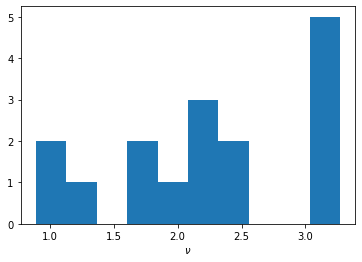

In [73]:
plt.hist(nus)
plt.xlabel(r'$\nu$')
plt.savefig('./plots/2.5radio_nus.pdf')

In [74]:
np.mean(cut_nu)

2.265741980898393

In [69]:
print(np.mean(nvss_fluxes))
print(np.mean(vlass_fluxes))

0.0005396945891544909
0.0016716606103633967


In [209]:
zipped_lists = zip(fluxes, nus)


sorted_zipped_lists = sorted(zipped_lists)
print(sorted_zipped_lists)

sorted_list1 = [element for _, element in sorted_zipped_lists]

[('-0.00010045965058290677', 9.342303801603004), ('-0.00010149660592343811', 5.227508672857886), ('-0.00011404907074314784', -0.9297979447671896), ('-0.0001151225882088625', 5.4446861381864595), ('-0.00011690936282653993', 7.060891630063547), ('-0.00012749096251602762', 2.1723800904260075), ('-0.00013255350976552722', 5.041101275997833), ('-0.0001365247765038332', 4.39619316266724), ('-0.00013857829095069053', 3.974785631478451), ('-0.0001431843065239943', 5.870708758859971), ('-0.00014783496228338683', 1.636197319182742), ('-0.00015043098723174314', 4.170991587694809), ('-0.00015465581130614985', 5.830837554548109), ('-0.00015484440721977492', 6.630081170189851), ('-0.00015768049979300702', 3.7339682436992008), ('-0.0001640878616092282', 1.2437125774361686), ('-0.00016858372779047983', 2.992933286857028), ('-0.00017459159381320733', 6.876136712508439), ('-0.00017544288716815528', 0.051837140503572667), ('-0.00018344077934550894', 3.8157737820526876), ('-0.00018538519631178024', 1.4259

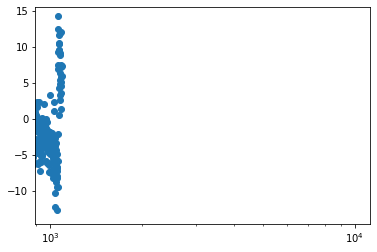

In [226]:
fluxes.sort()
rescale = [1e3*float(flux) for flux in fluxes]
plt.scatter(fluxes, sorted_list1)
plt.xscale('log')
#plt.xticks(np.arange(-1e-4,1e-2, step = 1e-3))

In [229]:
print(np.mean(nvss_mdcw_fluxes))

0.004126651915368459


In [244]:
for i, flux, in enumerate(vlassactFluxArr):
    if np.isnan(flux):
        vlassactFluxArr.pop(i)

In [19]:
print(v['MOO J0208-2951'])

KeyError: 'MOO J0208-2951'

In [7]:
#Clusters with y_0< -0.5
names = ['MOO J0043-2338', 'MOO J0208-2951', 'MOO J0306+0857', 'MOO J0354-2522',
 'MOO J0936+0336', 'MOO J2052-1408', 'MOO J2247+0507', 'MOO J2347-2734',
 'MOO J2038-3334']
for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        print('h')
    print(nvss_mdcw_fluxes_dict[name])


MOO J0043-2338
h
[0.0059675188726551085, 0.00019149398712327173]
MOO J0208-2951
h
[0.03931925903658593, -0.00019755247822176992]
MOO J0306+0857
h
[0.03281623855447538, 0.0004513995702705938]
MOO J0354-2522
h
[0.2064431466705777, 0.0002227625510443941]
MOO J0936+0336
h
[0.036242353598764744, -0.00045654470223637286]
MOO J2052-1408
h
[0.0022240629888389167, 0.0005576805164401024]
MOO J2247+0507
h
[0.2201422664810533, 0.0002653516304617302]
MOO J2347-2734
h
[0.00040039119166035674, 0.00038353910240778864]
MOO J2038-3334
h
[0.007197404151314391, -0.00017308302389715423]


In [41]:
#High richness, low y0 clusters
names = ['MOO J0110-1521', 'MOO J0133-1057', 'MOO J0305+0453',
           'MOO J0448-1705', 'MOO J1322-0228', 'MOO J1346-0142',
           'MOO J1514+1346', 'MOO J0012+1602', 'MOO J1221+1603',
           'MOO J1426+1741']

for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        print('h')
    print(nvss_mdcw_fluxes_dict[name])

MOO J0110-1521
h
[0.010233948248307131, -0.0004404534178601427]
MOO J0133-1057
h
[0.0058933376467126585, 0.0001266137209136411]
MOO J0305+0453
h
[0.03502558255267253, 0.0014892267338920033]
MOO J0448-1705
h
[0.0057291347559922596, 0.001253648671692225]
MOO J1322-0228
h
[0.0013319518467223008, 0.0003441544156424413]
MOO J1346-0142
h
[0.008598731682915361, 0.0008955004024549659]
MOO J1514+1346
h
[0.003021608801664628, 1.542291127703354e-05]
MOO J0012+1602
h
[0.012421487827244023, -0.0002646806151062457]
MOO J1221+1603
h
[0.002046866962660624, -0.00013855129909827408]
MOO J1426+1741
h
[0.0018466689782928264, -0.00022097920897193494]


In [8]:
names = ['MOO J1052+0823']
for name in names:
    print(name)
    try:
        print(vlass_mdcw_fluxes_dict[name])
    except:
        continue
    print(nvss_mdcw_fluxes_dict[name])

MOO J1052+0823


In [92]:
print('{:.2f}'.format(np.sqrt(x**2+y**2+z**2)))

3.47


In [95]:
#print(back_sub_nvss_mdcw_fluxes[2573])
nums = np.where((back_sub_nvss_mdcw_fluxes >1e-2))[0]
print(nums)
keys = []
for i, key in enumerate(mdcw_fluxes_dict.keys()):
    if i-1 in nums:
        print(key)
        keys.append(key)
        print((mdcw_fluxes_dict[key][0] - mdcw_fluxes_dict[key][1]))

[  48  134  197  418  688  706  853 1588 1664 1806 1911 2573 2651 2668
 2680]
MOO J1922+7918
0.018707761403196084
MOO J1533+6516
0.011050086350457506
MOO J1426+0925
0.036907413066557884
MOO J2247+0507
0.02159376917263856
MOO J0318+2139
0.02005494564323441
MOO J1251+2823
0.011431284389121207
MOO J1034+3104
0.019365208568623903
MOO J1245+7613
0.017534387783171863
MOO J1116+2659
0.0222345317533526
MOO J1422-0910
0.020466561667721275
MOO J2218-1820
0.011782628682907914
MOO J1404+6550
0.0911767144427054
MOO J1124+0455
0.010769117842479706
MOO J0354-2522
0.02019328936597362
MOO J2056-1954
0.015633602058907112


In [98]:
for key in vlass_dict_mdcw.keys():
    if key[:-5] in keys:
        print(key[:-5])
        print(vlass_mdcw_fluxes_dict[key][0] - vlass_mdcw_fluxes_dict[key][1])
        print((mdcw_fluxes_dict[key[:-5]][0] - mdcw_fluxes_dict[key[:-5]][1]))

MOO J1533+6516
0.034670352695172824
0.011050086350457506
MOO J1422-0910
0.10761154950481
0.020466561667721275
MOO J0318+2139
0.06283476492228601
0.02005494564323441
MOO J1251+2823
0.06670596744178248
0.011431284389121207
MOO J1245+7613
0.06291448007203826
0.017534387783171863
MOO J0354-2522
0.053127419833558065
0.02019328936597362
MOO J2247+0507
0.08412190346632542
0.02159376917263856
MOO J2218-1820
0.01902228060875899
0.011782628682907914
MOO J1426+0925
0.10372629031706992
0.036907413066557884
